<a href="https://colab.research.google.com/github/snnipetr/pnby-data-analysis/blob/main/Pnby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section-1

## **Importing Libraries**

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import sqlite3
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## **Loading the Data**

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
interview_txn_data = pd.read_csv('/content/drive/MyDrive/PayNearby Analyst Assessment.rar (Unzipped Files)/interview_txn_data.csv')
interview_ticket_data = pd.read_csv('/content/drive/MyDrive/PayNearby Analyst Assessment.rar (Unzipped Files)/interview_ticket_data.csv')

In [252]:
dff = interview_txn_data

In [253]:
display(interview_txn_data.head())
interview_txn_data.info()
interview_txn_data.describe()

,Unnamed: 0,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID,date
0,0,2.0,12104,2018-10-14 13:52:31 UTC,2,1,1,2018-10
1,1,2.0,12104,2018-08-11 16:55:33 UTC,2,1,1,2018-08
2,2,2.0,24979501,2019-02-21 16:33:03 UTC,2,1,1,2019-02
3,3,2.0,12104,2018-09-20 18:15:22 UTC,2,1,1,2018-09
4,4,100.0,15957319,2018-07-22 07:14:24 UTC,2,1,1,2018-07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412682 entries, 0 to 3412681
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Amount                  float64
 2   PayeeRefID              int64  
 3   CreatedDate             object 
 4   TransactionStatusRefID  int64  
 5   AgentRefID              int64  
 6   DistributorRefID        int64  
 7   date                    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 208.3+ MB


,Unnamed: 0,Amount,PayeeRefID,TransactionStatusRefID,AgentRefID,DistributorRefID
count,3.412682e+06,3.412682e+06,3.412682e+06,3.412682e+06,3.412682e+06,3.412682e+06
mean,1.706340e+06,2.474055e+03,1.222930e+07,2.254620e+00,1.162550e+03,7.610891e+02
std,9.851566e+05,3.318672e+03,8.836741e+06,1.171772e+00,1.225874e+03,8.514879e+02
min,0.000000e+00,5.500000e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,8.531702e+05,1.000000e+00,0.000000e+00,2.000000e+00,2.890000e+02,1.930000e+02
50%,1.706340e+06,2.000000e+03,1.550672e+07,2.000000e+00,6.740000e+02,3.870000e+02
75%,2.559511e+06,4.100000e+03,1.968568e+07,2.000000e+00,1.677000e+03,1.095000e+03
max,3.412681e+06,4.999900e+04,2.503252e+07,1.000000e+01,4.596000e+03,3.131000e+03


Transaction Amount ranges between 0.55 Rupees and 5000 Rupees

## **Checking Data For Missing Values**

In [254]:
interview_txn_data.isnull().values.any()

False

## **Changing time format to Month/Year**

The following cells were run once and the corresponding DF was saved in a CSV. This was done in order to reduce the computation time as the number of datapoints were to huge.

In [255]:
#To change Datetime format to MM-YYYY 
# func = {lambda x: pd.Timestamp(x).strftime('%Y-%m')}
# interview_txn_data['date'] = interview_txn_data['CreatedDate'].apply(func,raw=True)

In [256]:
df = interview_txn_data.copy()
display(df.head())

,Unnamed: 0,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID,date
0,0,2.0,12104,2018-10-14 13:52:31 UTC,2,1,1,2018-10
1,1,2.0,12104,2018-08-11 16:55:33 UTC,2,1,1,2018-08
2,2,2.0,24979501,2019-02-21 16:33:03 UTC,2,1,1,2019-02
3,3,2.0,12104,2018-09-20 18:15:22 UTC,2,1,1,2018-09
4,4,100.0,15957319,2018-07-22 07:14:24 UTC,2,1,1,2018-07


## **Monthly transaction Volume:**

In [257]:
#Check Transaction Volume w.r.t months
df2 = df.groupby(['date'])['TransactionStatusRefID'].count()
df2 = pd.DataFrame({'date':df2.index, 'Count':df2.values})
df2.head(30)

,date,Count
0,2018-07,426778
1,2018-08,463881
2,2018-09,477708
3,2018-10,418334
4,2018-11,406087
5,2018-12,486264
6,2019-01,424869
7,2019-02,308761


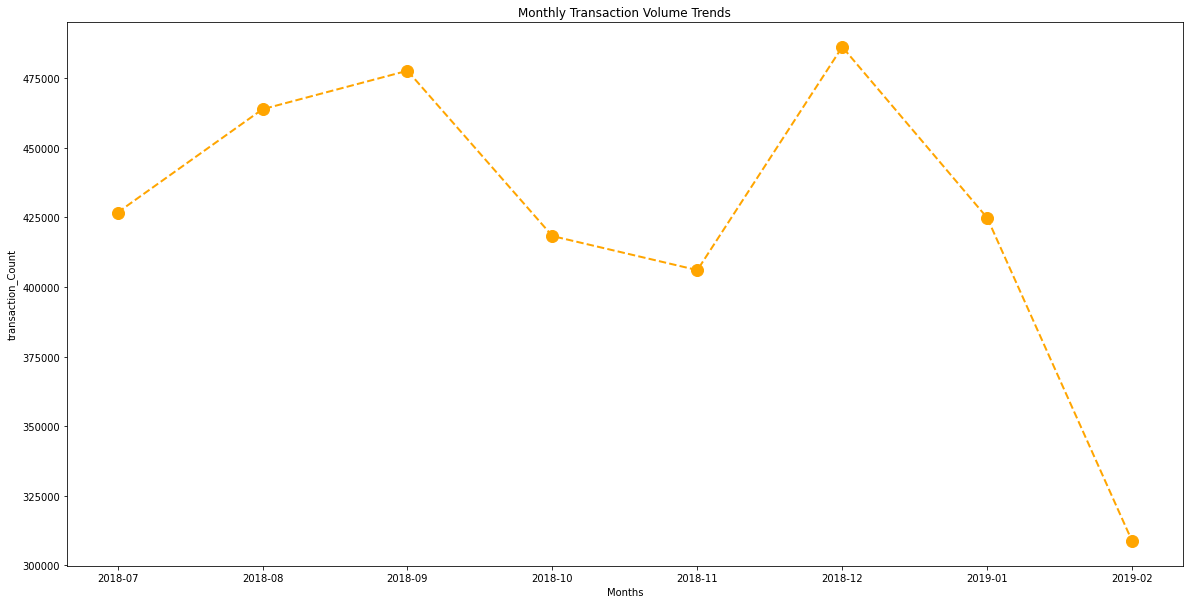

In [258]:
plt.figure(figsize=(20, 10))
plt.title("Monthly Transaction Volume Trends")
plt.xlabel("Months")
plt.ylabel("transaction_Count")
display(plt.plot(df2['date'], df2['Count'], color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=12))

From the above graph it can be seen that the lending was reduced for the months of October and November but was highl during September and November which can be attributed to Festivities during october and November. I think the demand was high during september and october as businessess require credit for preparation of High Product Demand during festivities. Demand was low during January too but had a spike in December which signals similarity to the months of september to November.

## **Successfull Transactions for the entire period**

In [259]:
df3 = df.groupby(['TransactionStatusRefID']).date.count()
df3 = pd.DataFrame({'type':df3.index,'Count':df3.values})
df3.head()

,type,Count
0,1,16723
1,2,3219211
2,4,19
3,6,125228
4,9,27299


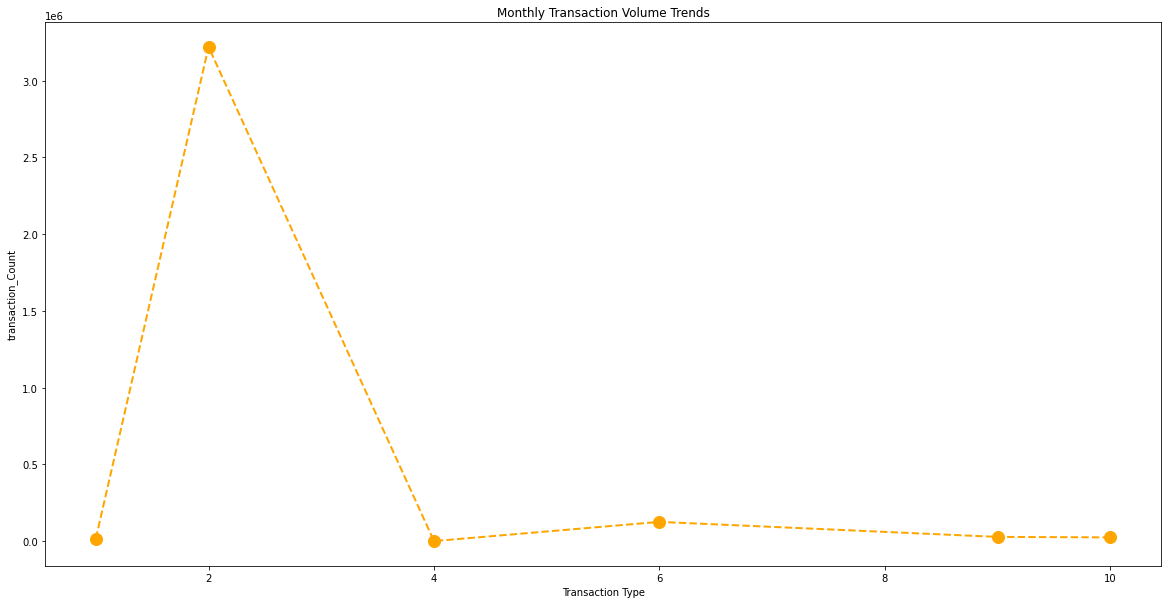

In [260]:
plt.figure(figsize=(20, 10))
plt.title("Monthly Transaction Volume Trends")
plt.xlabel("Transaction Type")
plt.ylabel("transaction_Count")
display(plt.plot(df3['type'], df3['Count'], color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=12))
del(df3)

In [261]:
df.loc[df["TransactionStatusRefID"] == 2, "TransactionStatusRefID"] = "Success"
df.loc[df["TransactionStatusRefID"] != "Success", "TransactionStatusRefID"] = "Failure"
df.head()

,Unnamed: 0,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID,date
0,0,2.0,12104,2018-10-14 13:52:31 UTC,Success,1,1,2018-10
1,1,2.0,12104,2018-08-11 16:55:33 UTC,Success,1,1,2018-08
2,2,2.0,24979501,2019-02-21 16:33:03 UTC,Success,1,1,2019-02
3,3,2.0,12104,2018-09-20 18:15:22 UTC,Success,1,1,2018-09
4,4,100.0,15957319,2018-07-22 07:14:24 UTC,Success,1,1,2018-07


In [262]:
df5 = df.groupby(['TransactionStatusRefID']).count()
df5.reset_index(inplace=True)

The Rate of Successfull Transaction was well over 94% throughout the period. Failed Transactions may arise due to a plethora of factors.

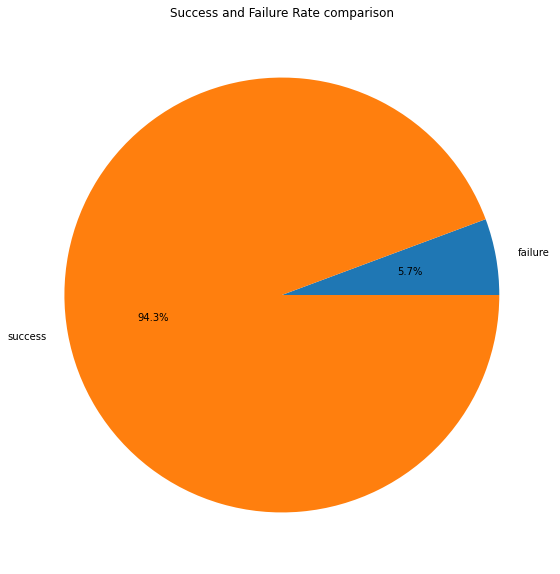

In [263]:
plt.figure(figsize=(20, 10))
plt.title('Success and Failure Rate comparison')
plt.pie( df5['date'],labels=['failure','success'],autopct='%1.1f%%')
del(df5)

In [264]:
months = df['date'].unique()
dg = {}
for x in range(len(months)):
  dg[months[x]] = df.loc[df['date']==months[x]]

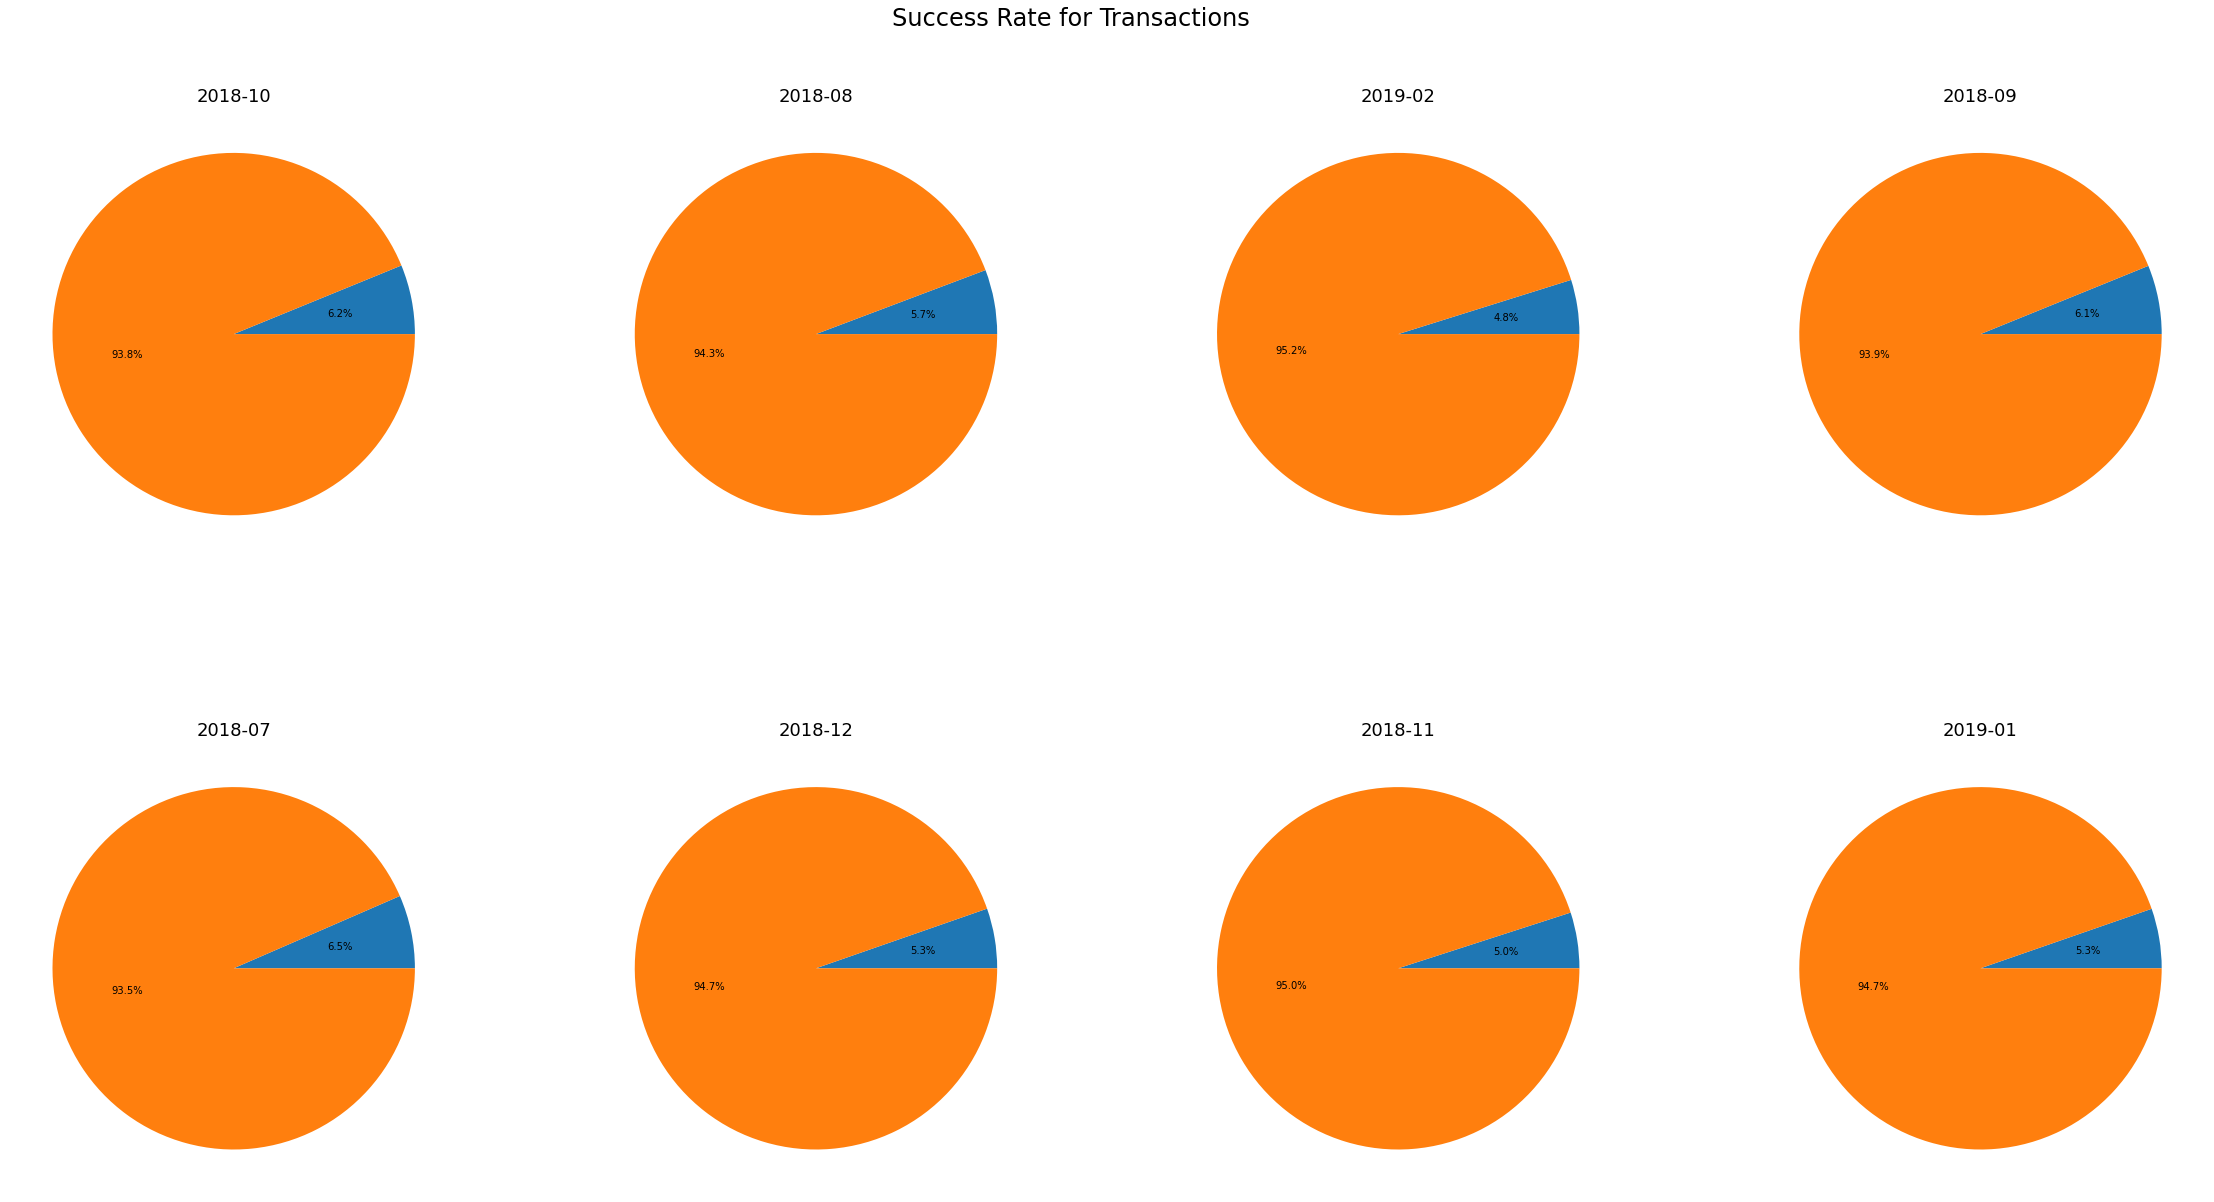

In [265]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.4)
plt.suptitle("Success Rate for Transactions", fontsize=24, y=0.95)
success = []
failures = []
for n, month in enumerate(months):
    # add a new subplot iteratively
    ax = plt.subplot(2,4, n + 1)

    # filter df and plot ticker on the new subplot axis
    ndf = dg[month].groupby(['TransactionStatusRefID']).count()
    ndf.reset_index(inplace=True)
    success.append(ndf['date'][0])
    failures.append(ndf['date'][1])

    plt.pie( ndf['date'],autopct='%1.1f%%')
    # chart formatting
    ax.set_title(month,fontsize=18)
    ax.set_xlabel("")


## **Trends between transaction volume and Transaction Amount**

In [266]:
df6 = df.loc[df['TransactionStatusRefID']=="Success"]
df6 = df6.groupby('date')["Amount"].sum()
df6 = pd.DataFrame(df6)
df6.reset_index(inplace=True)
df6.head(30)
df7 = df6

### **Scaling Transaction Volume and Transaction Amount Data**

In [267]:
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df6[['Amount']])
df6[['Amount']] = scaled_array

In [268]:
scaled_array2 = scaler.fit_transform(df2[['Count']])
df2[['Count']] = scaled_array2

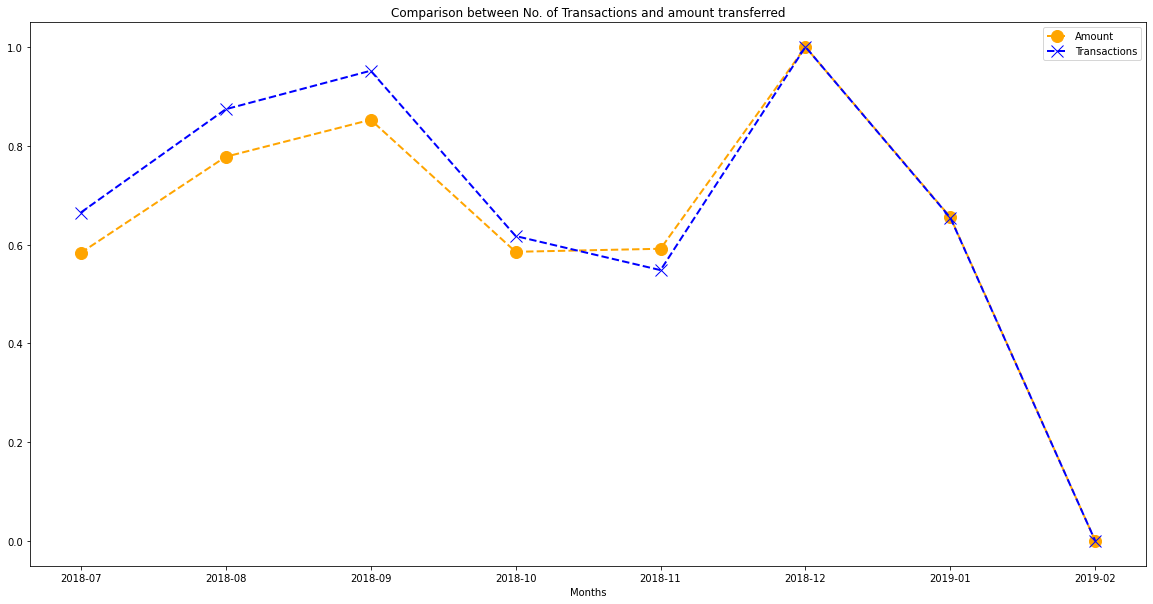

In [269]:
plt.figure(figsize=(20, 10))
plt.title("Comparison between No. of Transactions and amount transferred")
plt.xlabel("Months")
display(plt.plot(df6['date'], df6['Amount'], color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=12))
display(plt.plot(df2['date'], df2['Count'], color='blue', marker='x', linestyle='dashed',linewidth=2, markersize=12))
plt.legend(['Amount','Transactions'])


## **Transactions Analysis per month**

In [270]:
months = df['date'].unique()
months.sort()
dg = {}
for x in range(len(months)):
  dg[months[x]] = df.loc[df['date']==months[x]]
len(dg)

8

In [271]:

success = []
failures = []
for n, month in enumerate(months):
    ndf = dg[month].groupby(['TransactionStatusRefID']).count()
    ndf.reset_index(inplace=True)
    success.append(ndf['date'][1])
    failures.append(ndf['date'][0])

Text(0.5, 0.95, 'Trendlines for Success Rate of Transactions')

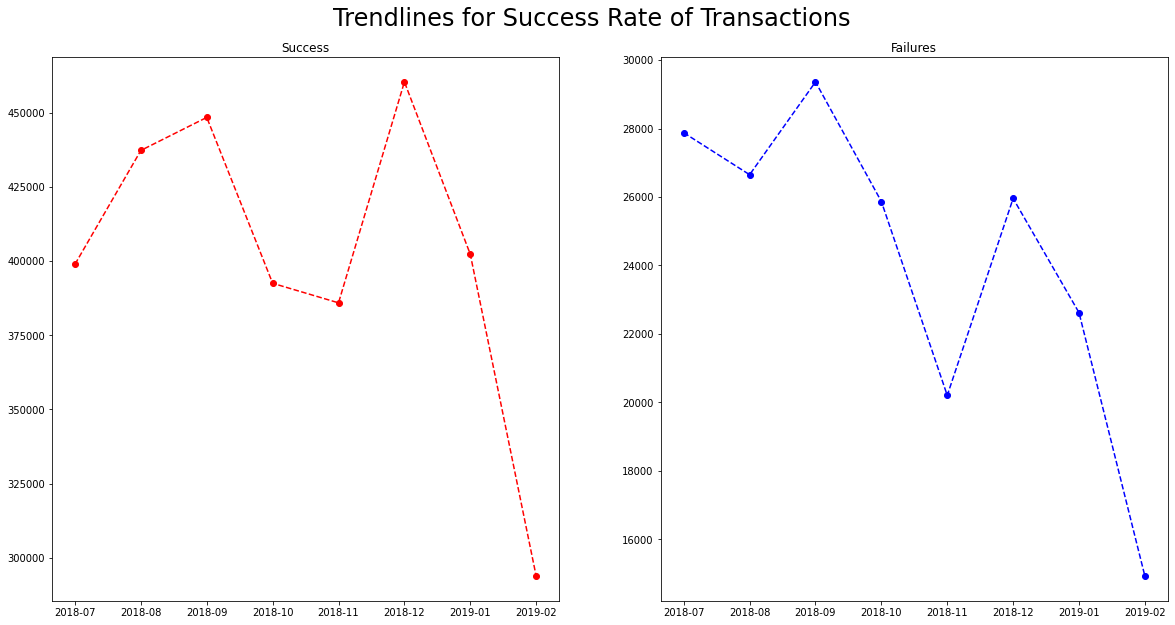

In [272]:
fig,axes = plt.subplots(1, 2,figsize=(20,10))
plt.subplots_adjust(hspace=0.4)
axes[0].set_title("Success")
axes[0].plot(months,success, 'r--o') 
axes[1].set_title("Failures")
axes[1].plot(months, failures, 'b--o')
plt.suptitle("Trendlines for Success Rate of Transactions", fontsize=24, y=0.95)

In [273]:
df7["growth"] = ""
n = len(df7["Amount"])
for i in range(1,n):
  df7["growth"][i] = ((df7["Amount"][i]-df7["Amount"][i-1])/(df7["Amount"][i-1]))*100
df7["growth"][0] = 0
df7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,Amount,growth
0,2018-07,0.583283,0
1,2018-08,0.777723,33.335517
2,2018-09,0.852569,9.623701
3,2018-10,0.585383,-31.338915
4,2018-11,0.591526,1.049443
5,2018-12,1.000000,69.054135
6,2019-01,0.655169,-34.483053
7,2019-02,0.000000,-100.0


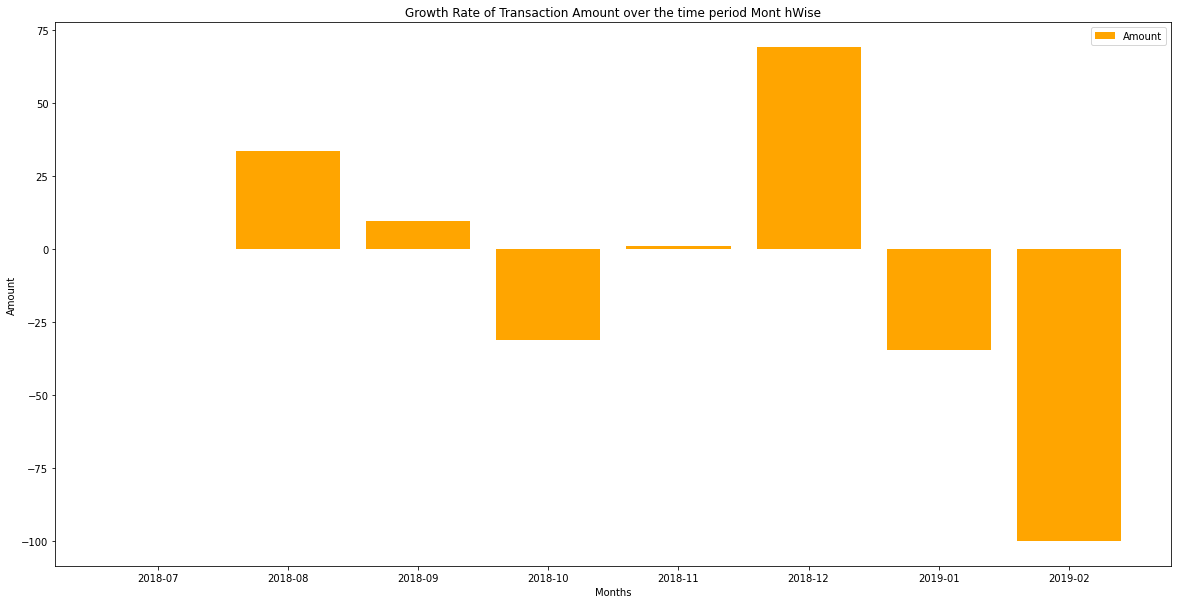

In [274]:
plt.figure(figsize=(20, 10))
plt.title("Growth Rate of Transaction Amount over the time period Mont hWise")
plt.xlabel("Months")
plt.ylabel("Amount")
plt.bar(df7['date'],df7['growth'],color = 'orange')
plt.legend(['Amount','Transactions'])


# Section 2: SQL Queries

##### I tried creating the database in MySQL but was unable to do so as it was taking a lot of time. So I have used Pandas to create SQL Queries. However for the second Part of the Question some MYSQL Functions like LAG() and LEAD() dont work with sqlite. I have written the raw query below but was unable to verify it's working. Please pardon my mistake.

In [275]:
from sqlite3 import connect
conn = connect(':memory:')
cursor = conn.cursor()
dff.to_sql('test_data', conn)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [277]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412682 entries, 0 to 3412681
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Amount                  float64
 2   PayeeRefID              int64  
 3   CreatedDate             object 
 4   TransactionStatusRefID  int64  
 5   AgentRefID              int64  
 6   DistributorRefID        int64  
 7   date                    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 208.3+ MB


In [278]:
dff['CreatedDate']= pd.to_datetime(dff['CreatedDate'])

In [279]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412682 entries, 0 to 3412681
Data columns (total 8 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Unnamed: 0              int64              
 1   Amount                  float64            
 2   PayeeRefID              int64              
 3   CreatedDate             datetime64[ns, UTC]
 4   TransactionStatusRefID  int64              
 5   AgentRefID              int64              
 6   DistributorRefID        int64              
 7   date                    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(1)
memory usage: 208.3+ MB


Query 1:


```
# This is formatted as code
SELECT AgentRefID ,count(TransactionStatusRefID) as count 
  FROM test_data 
  group by AgentRefID  
  having Amount>100 and 
  TransactionStatusRefID=2';
```



In [280]:
pd.read_sql('SELECT AgentRefID ,count(TransactionStatusRefID) as count FROM test_data group by AgentRefID  having Amount>100 and TransactionStatusRefID=2', conn)

,AgentRefID,count
0,2,3945
1,3,986
2,4,687
3,5,3132
4,6,423
...,...,...
4218,4592,154
4219,4593,170
4220,4594,374
4221,4595,7


Query 2: 
```
# This is formatted as code
  SELECT MONTH(CreatedDate) as month,
         SUM(Amount) as revenue,
         (revenue - LAG (revenue) OVER (ORDER BY month ASC))/LAG (revenue) 
         OVER (ORDER BY month ASC)*100 AS percentage_growth
         FROM test_data 
         where YEAR(CreatedDate) = "2018" AND
         TransactionStatusRefID = 2 
         GROUP BY month;

```
In case MONTH does not work:


```
# This is formatted as code
  SELECT STRFTIME("%m",CreatedDate) as month,
         SUM(Amount) as revenue,
         (revenue - LAG (revenue) OVER (ORDER BY month ASC))/LAG (revenue) 
         OVER (ORDER BY month ASC)*100 AS percentage_growth
         FROM test_data 
         where YEAR(CreatedDate) = "2018" AND
         TransactionStatusRefID = 2 
         GROUP BY month;
```



